## 🔁 Cambio de base aplicado a datos

En este cuaderno quiero experimentar con cómo una matriz puede cambiar la **base** en la que representamos nuestros datos.

Ya he visto que multiplicar por matrices puede rotar, deformar o estirar figuras. Ahora, en lugar de transformar la figura en el mismo sistema de referencia, voy a **cambiar el sistema de coordenadas**.

Esto es fundamental para entender cómo funcionan técnicas como **PCA**, **explicabilidad de variables** y **reducción de dimensión**.

Lo que voy a hacer:

- Crear una nube de puntos en 2D.
- Definir una nueva base (dos vectores linealmente independientes).
- Ver cómo cambian las coordenadas del mismo punto respecto a esta nueva base.
- Visualizarlo todo paso a paso.


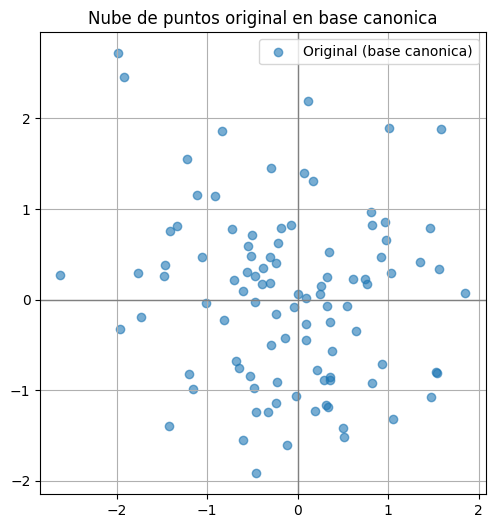

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear puntos aleatorios centrados en (0,0)
np.random.seed(42)
X = np.random.randn(2, 100) # 2 dimensiones, 100 puntos

# Mostrar puntos
plt.figure(figsize=(6, 6))
plt.scatter(X[0], X[1], alpha=0.6, label="Original (base canonica)")
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title("Nube de puntos original en base canonica")
plt.show()

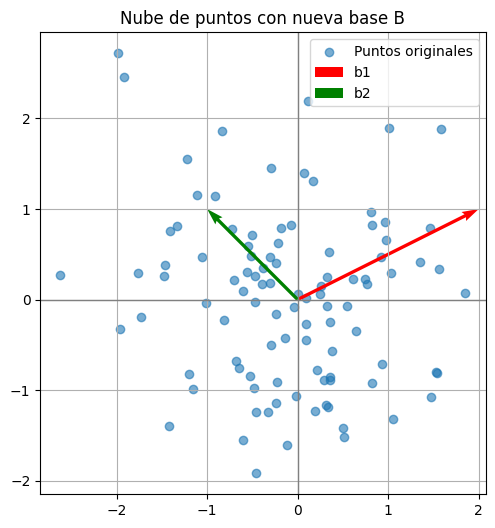

In [2]:
# Nueva base B (columnas = vectores de base)
b1 = np.array([2, 1])
b2 = np.array([-1, 1])
B = np.column_stack((b1, b2)) # Cada columna es un vector base

# Mostrar los vectores de base
plt.figure(figsize=(6, 6))
plt.scatter(X[0], X[1], alpha=0.6, label="Puntos originales")
plt.quiver(0, 0, b1[0], b1[1], angles='xy', scale_units='xy', scale=1, color='red', label='b1')
plt.quiver(0, 0, b2[0], b2[1], angles='xy', scale_units='xy', scale=1, color='green', label='b2')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title("Nube de puntos con nueva base B")
plt.show()

## 🧭 Reexpresar puntos en una nueva base

En este bloque he aprendido que no siempre es necesario transformar los datos, sino que también podemos **cambiar la perspectiva desde la cual los miramos**.

### 🔁 Cambio de base

He definido una nueva base B compuesta por dos vectores linealmente independientes:

\[
B = [\begin{array}{cc}
2 & -1 \\
1 & 1 \\
\end{array}]
\]

Para expresar los puntos en esta nueva base, he usado la fórmula:

\[
X_B = B^{-1} \cdot X
\]

Esto me da las **coordenadas que tendría cada punto si midiera el espacio con la base B** en lugar de la base canónica (la habitual: ejes x e y perpendiculares).

### ¿Por qué la inversa?

Porque cambiar de base es como deshacer la transformación que aplica B. Si B transforma vectores de su propia base a la canónica, entonces \( B^{-1} \) hace lo contrario: lleva coordenadas de la base canónica **a la base B**.

Es un concepto clave para entender cómo se comportan los datos en diferentes sistemas de referencia.



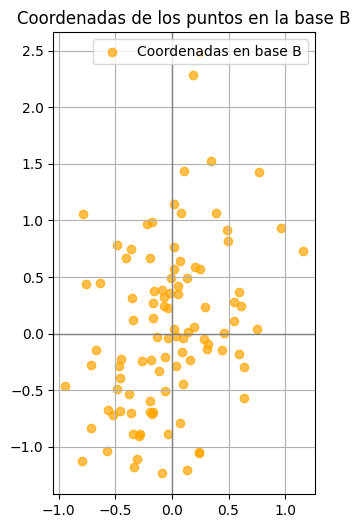

In [3]:
# Inversa de la base
B_inv = np.linalg.inv(B)

# Reexpresar los puntos en la nueva base
X_B = B_inv @ X

# Visualizar puntos en la nueva base
plt.figure(figsize=(6, 6))
plt.scatter(X_B[0], X_B[1], color='orange', alpha=0.7, label='Coordenadas en base B')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title("Coordenadas de los puntos en la base B")
plt.show()

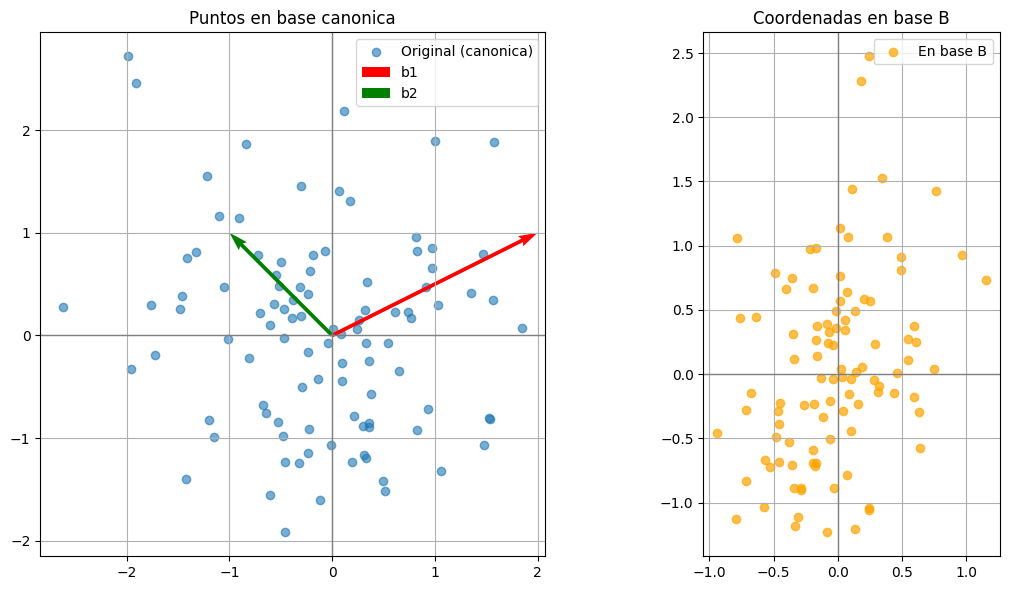

In [5]:
# En este bloque comparo los puntos originales y los puntos en la nueva base

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Puntos en la base canonica
axs[0].scatter(X[0], X[1], alpha=0.6, label="Original (canonica)")
axs[0].quiver(0, 0, b1[0], b1[1], angles='xy', scale_units='xy', scale=1, color='red', label='b1')
axs[0].quiver(0, 0, b2[0], b2[1], angles='xy', scale_units='xy', scale=1, color='green', label='b2')

axs[0].axhline(0, color='grey', lw=1)
axs[0].axvline(0, color='grey', lw=1)

axs[0].set_aspect('equal')
axs[0].set_title("Puntos en base canonica")
axs[0].legend()
axs[0].grid(True)

# Puntos expresados en la base B
axs[1].scatter(X_B[0], X_B[1], color='orange', alpha=0.7, label="En base B")
axs[1].axhline(0, color='grey', lw=1)
axs[1].axvline(0, color='grey', lw=1)
axs[1].set_aspect('equal')
axs[1].set_title("Coordenadas en base B")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()